## Support Vector Regression(SVR)

### 알고리즘의 원리
- 분류에서 배울 Support Vector Machine을 회귀 몬제에 적용한 모델
- SVM 간단 설명
  - 클래스 간의 분리를 최대화하는 방향으로 결정 경계를 생성
  - 선형적으로 구분 가능한 데이터를 분류할 때 사용.
- SVR
  - 마진을 넓혀 벡터 사이에 들어가는 값들이 최대한 많을 수 있도록 동작
  - 즉, 아래 그림에서 마진 밖에 있는 Error값들이 최소가 될 수 있도록 하는 것이 목적

  ![](https://velog.velcdn.com/images/newnew_daddy/post/67eea226-2d8f-4e2b-bb26-f61c573b513e/image.png)

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

plt.rcParams['font.family'] = 'AppleGothic'

In [9]:
df = pd.read_csv("./dataset/boston.csv")

X = df[df.columns[:-1]]
y = df[df.columns[-1]]

X.shape, y.shape

((506, 13), (506,))

In [10]:
# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
svr = SVR(
    kernel='rbf',
    C=100,
    epsilon=0.1,
    gamma='auto'
    )

svr.fit(X_train, y_train)

SVR(C=100, gamma='auto')

In [15]:
print(svr.score(X_train, y_train))
print(svr.score(X_test, y_test))

0.973010966307799
0.837950038602421


In [24]:
y_pred = svr.predict(X_test)

In [25]:
from utils import evaluate_reg_model

evaluate_reg_model(y_test, y_pred)

MAE: 2.1604847400146516
MAPE: 11.946864948670182
MSE: 12.074844260386968
RMSE: 3.4748876615492144
R2 Score: 0.837950038602421


<Axes: xlabel='target', ylabel='target'>

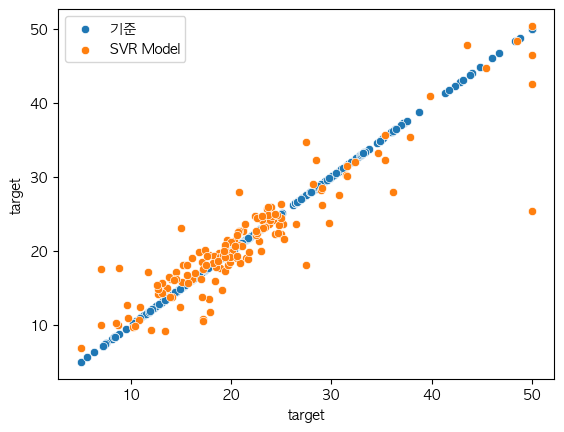

In [28]:
sns.scatterplot(x = y_train, y = y_train, label="기준")
sns.scatterplot(x = y_test, y = y_pred, label='SVR Model')

## DecisionTreeRegressor
- 분류에 많이 활용되는 결정 트리 알고리즘을 사용하여 연속형 타겟 값을 예측하는 회귀 모델
- 분기마다 MSE(Mean Squared Error)값이 감소하는 방향으로 분할하여 값을 예측
- 트리의 깊이가 너무 깊어지면 과적합되기 쉬우므로 최대 깊이를 제한하는 등의 방식을 통해 과적합 방지

![](https://velog.velcdn.com/images/newnew_daddy/post/d22627eb-7eb0-4901-a46f-efac8d8fca86/image.png)


Mean Squared Error: 0.0141


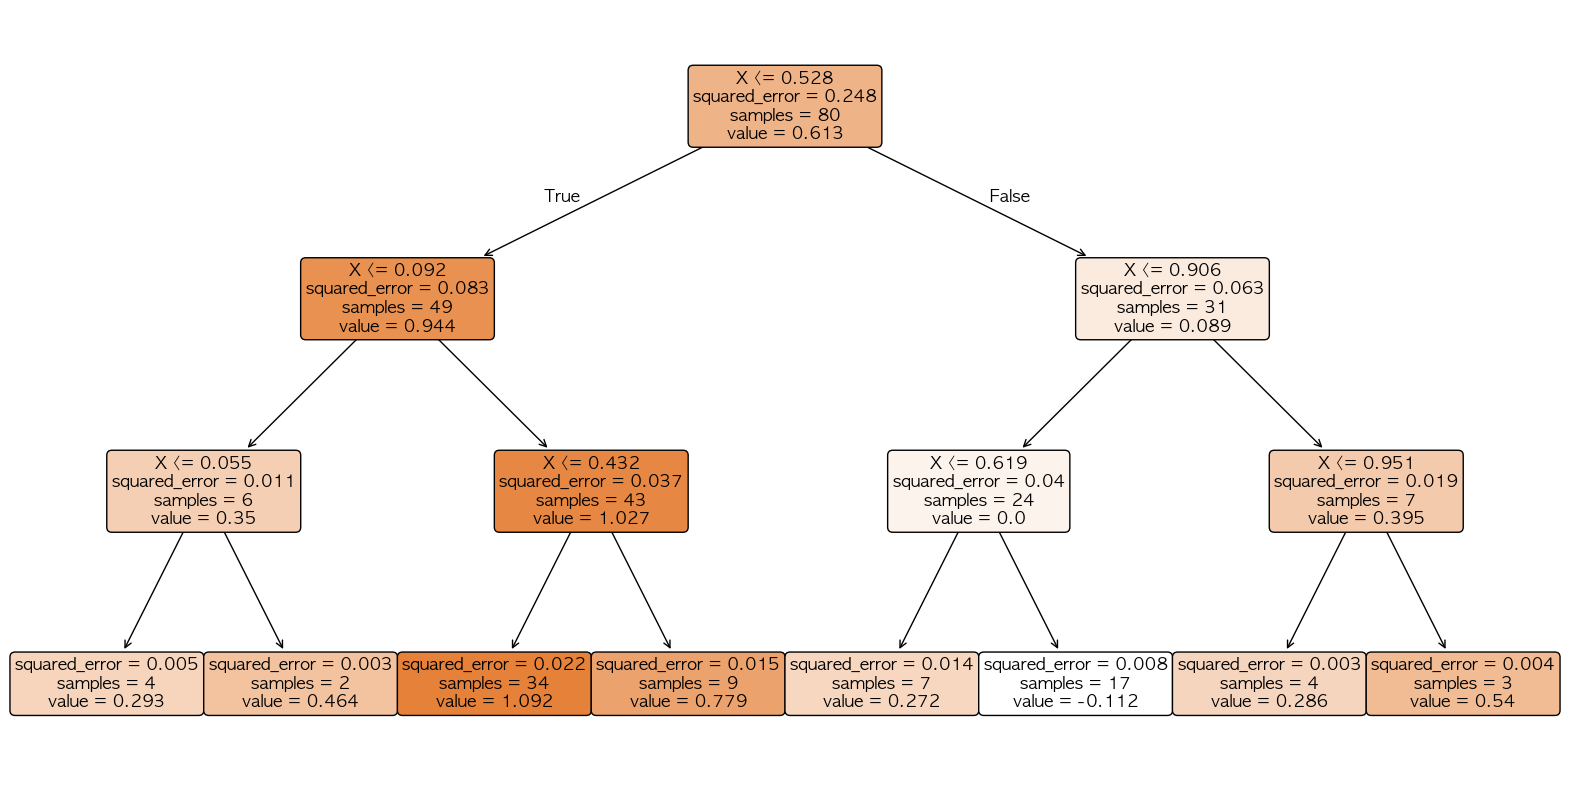

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import graphviz

# 예제 데이터 생성
X = np.random.rand(100, 1)  # 100개의 샘플, 1개의 특징
y = X.squeeze() + np.sin(6 * X).squeeze()  # 타겟 값 생성

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성 및 학습
tree_reg = DecisionTreeRegressor(max_depth=3)
tree_reg.fit(X_train, y_train)

# 예측 및 평가
y_pred = tree_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# plot_tree를 사용한 시각화
plt.figure(figsize=(20, 10))
plot_tree(tree_reg, filled=True, feature_names=['X'], rounded=True)
plt.show()

# export_graphviz를 사용한 시각화
dot_data = export_graphviz(tree_reg, out_file=None, 
                           feature_names=['X'],
                           filled=True, rounded=True, 
                           special_characters=True)

# Graphviz 소스를 시각화
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # PDF 파일로 저장
graph


Mean Squared Error: 0.0141


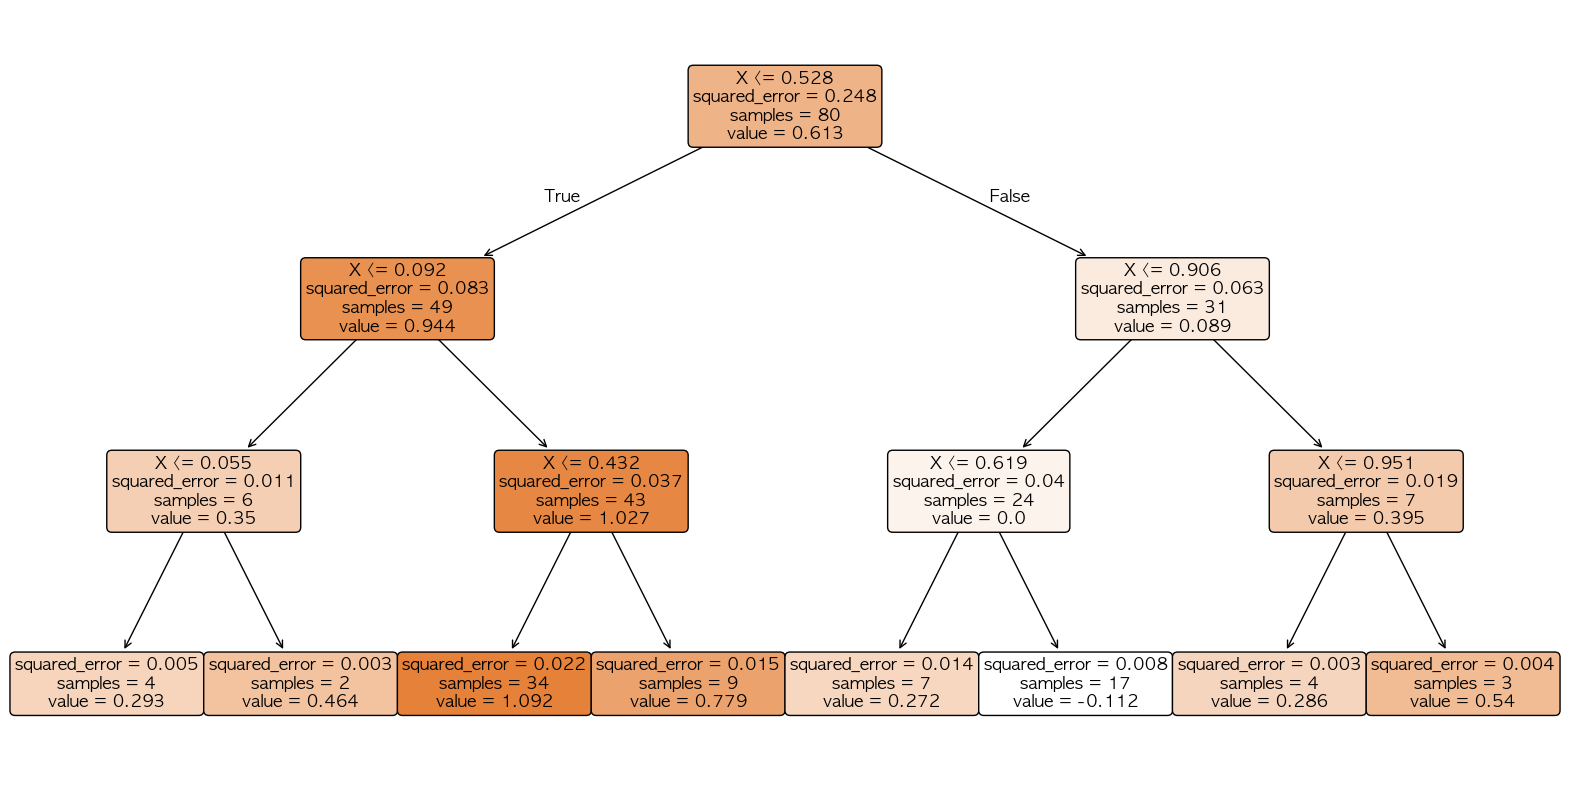

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import graphviz

# 예제 데이터 생성
X = np.random.rand(100, 1)  # 100개의 샘플, 1개의 특징
y = X.squeeze() + np.sin(6 * X).squeeze()  # 타겟 값 생성

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성 및 학습
tree_reg = DecisionTreeRegressor(max_depth=3)
tree_reg.fit(X_train, y_train)

# 예측 및 평가
y_pred = tree_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# plot_tree를 사용한 시각화
plt.figure(figsize=(20, 10))
plot_tree(tree_reg, filled=True, feature_names=['X'], rounded=True)
plt.show()

# export_graphviz를 사용한 시각화
dot_data = export_graphviz(tree_reg, out_file=None, 
                           feature_names=['X'],
                           filled=True, rounded=True, 
                           special_characters=True)

# Graphviz 소스를 시각화
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # PDF 파일로 저장
graph


Mean Squared Error: 0.0141


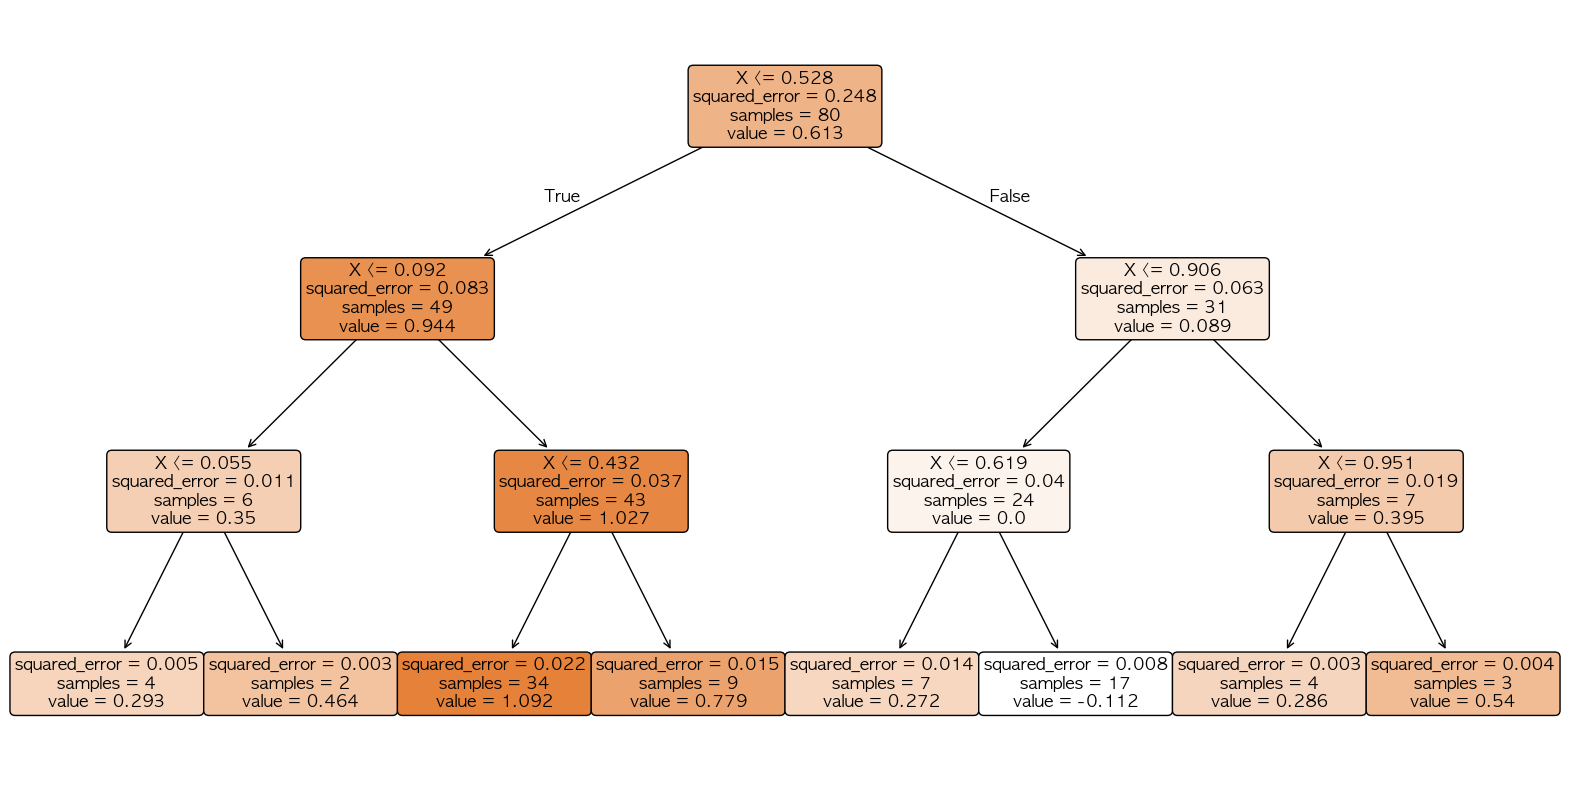

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import graphviz

# 예제 데이터 생성
X = np.random.rand(100, 1)  # 100개의 샘플, 1개의 특징
y = X.squeeze() + np.sin(6 * X).squeeze()  # 타겟 값 생성

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성 및 학습
tree_reg = DecisionTreeRegressor(max_depth=3)
tree_reg.fit(X_train, y_train)

# 예측 및 평가
y_pred = tree_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# plot_tree를 사용한 시각화
plt.figure(figsize=(20, 10))
plot_tree(tree_reg, filled=True, feature_names=['X'], rounded=True)
plt.show()

# export_graphviz를 사용한 시각화
dot_data = export_graphviz(tree_reg, out_file=None, 
                           feature_names=['X'],
                           filled=True, rounded=True, 
                           special_characters=True)

# Graphviz 소스를 시각화
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # PDF 파일로 저장
graph
